# The Barnsley Fern
The Barnsley fern is a fractal named after the British mathematician Michael Barnsley. In short, we can generate points in the **2D** plane using four affine transformations each having a different probability to be selected. All the transformations are defined with the following equation:

$$ f\left(x_{n+1}, y_{n+1}\right) = \begin{bmatrix} a & b \\ c & d \end{bmatrix} * \begin{bmatrix} x_{n}  \\ y_{n} \end{bmatrix} +  \begin{bmatrix} e  \\ f \end{bmatrix} $$

Depending on the probability we select a different set of coefficients. For more information please refer to the [Wikipedia Page](https://en.wikipedia.org/wiki/Barnsley_fern).

In [1]:
from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Coefficients for different types of fern
We can generate different types of fern depending on the provided set of coefficients.

In [2]:
transformations = namedtuple("transformations", ["f1", "f2", "f3", "f4"])
coefficients = namedtuple("coefficients", ["a", "b", "c", "d", "e", "f"])
fern_settings = namedtuple("fern_settings", ["transformations", "probabilities"])

## Barnsley Fern Coefficients

In [3]:
barnsley_fern_coefficients = transformations(
    f1=coefficients(.0, .0, .0, .16, .0, .0),
    f2=coefficients(.85, .04, -.04, .85, 0, 1.6),
    f3=coefficients(.20, -.26, .23, .22, .0, 1.6),
    f4=coefficients(-.15, .28, .26, .24, .0, .44),
)
barnsley_fern_probabilities = [.01, .85, .07, .07]
barnsley_fern = fern_settings(
    transformations=barnsley_fern_coefficients,
    probabilities=barnsley_fern_probabilities,
)

In [4]:
fishbone_fern_coefficients = transformations(
    f1=coefficients(.0, .0, .0, .25, .0, -.4),
    f2=coefficients(.95, .002, -.002, .93, -.002, .5),
    f3=coefficients(.035, -.11, .27, .01, -.05, .005),
    f4=coefficients(-.04, .11, .27, .01, .047, .06),
)
fishbone_fern_probabilities = [.02, 0.84, 0.07, 0.07]
fishbone_fern = fern_settings(
    transformations=fishbone_fern_coefficients,
    probabilities=fishbone_fern_probabilities,
)

In [5]:
fractal_tree_coefficients = transformations(
    f1=coefficients(.0, .0, .0, .5, .0, .0),
    f2=coefficients(.42, -.42, 0.42, .42, .0, .2),
    f3=coefficients(.42, .42, -.42, .42, .0, .2),
    f4=coefficients(.1, .0, .0, .1, .0, .2),
)
fractal_tree_probabilities = [.05, 0.4, 0.4, 0.15]
fractal_tree = fern_settings(
    transformations=fractal_tree_coefficients,
    probabilities=fractal_tree_probabilities,
)

We store all types of ferns in a dictionary which we can use later on the select the type of fern we want to generate.

In [6]:
ferns = dict(
    barnsley_fern=barnsley_fern,
    fishbone_fern=fishbone_fern,
    fractal_tree=fractal_tree
)

In [7]:
def generate_fern(fern_name: str, num_points: int) -> list:
    """Function to generate the points on the Barnsley Fern.

    Args:
        fern_name (str): the name of the fern to generate. Must be one of the
        keys in the `ferns` dictionary.
        
        num_points (int): number of points to generate
    
    Raises:
        KeyError: if the specified fern type is not supported

    Returns:
        list: list of tuples representing the points belonging 
            to the Barnsley Fern.
    """
    if fern_name not in ferns:
        raise KeyError("Not a supported type of fern")

    selected_fern_settings = ferns[fern_name]
    rng = np.random.default_rng()  # Generator object

    # generate `num_points` indexes from 0 to 3 according to the probability
    indexes = rng.choice(
        a=len(selected_fern_settings.probabilities),
        size=num_points, 
        p=selected_fern_settings.probabilities,
        shuffle=False
    )

    # x_0 and y_0 at time step 0
    x, y = .0, .0
    fern_points = []
    for idx in indexes:
        fern_points.append((x, y))  # save x_{n} and y_{n}
        coeff = selected_fern_settings.transformations[idx]

        # calculate x_{n + 1} and y_{n + 1} using x_{n} and y_{n}
        x, y = coeff.a * x + coeff.b * y + coeff.e, coeff.c * x + coeff.d * y + coeff.f

    return fern_points

In [8]:
def plot_fern(fern_name: str, num_points: int):
    """Make a plot of the points in the Sierpinski triangle.

    Args:
        fern_name (str): the name of the fern to generate. Must be one of the
        keys in the `ferns` dictionary.

        num_points (int): number of points to generate.
    """
    fern_points = generate_fern(fern_name, num_points)
    num_points = len(fern_points)
    points_split = list(zip(*fern_points))
    xx, yy = points_split[0], points_split[1]

    fig = plt.figure(figsize=(7, 7))
    ax = plt.axes()
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_axis_off()
    ax.scatter(xx, yy, c='g', marker='^', s=2)
    plt.savefig(f'{fern_name}_{num_points}_points.png', dpi=300, bbox_inches='tight')

# Generate and Plot Ferns

In [9]:
num_points = 100000

## Original Barnsley Fern

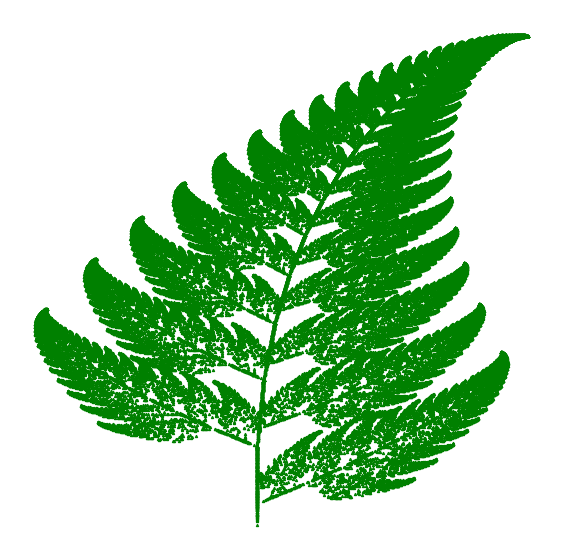

In [10]:
plot_fern("barnsley_fern", num_points)

## Fishbone Fern

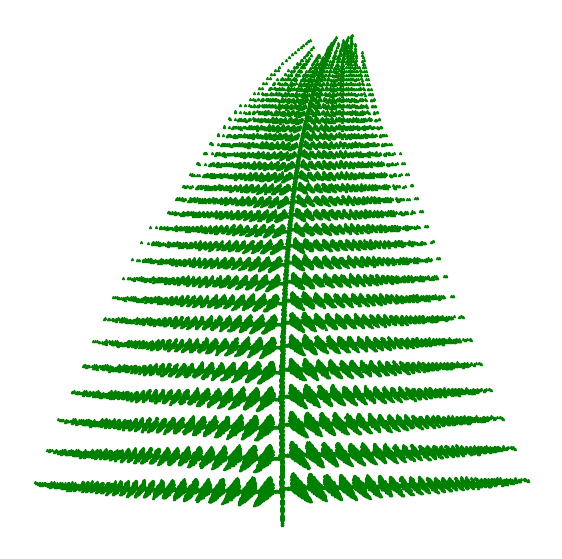

In [11]:
plot_fern("fishbone_fern", num_points)

## Fractal Tree

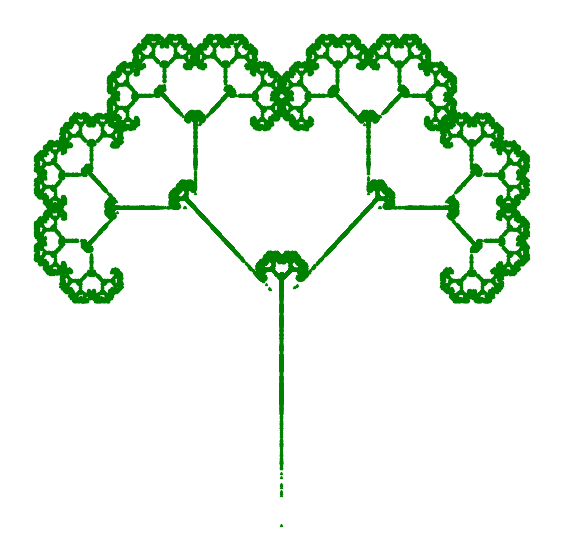

In [12]:
plot_fern("fractal_tree", num_points)